In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.table import Table
from dlnpyutils import coords
from dlnpyutils import utils as dln

In [4]:
galah = Table.read("C:\\Users\\Sarah\\Desktop\\Astro Research\\GALAH_DR3_main_allstar_v2.fits.gz")
glob_clust  = Table.read("C:\\Users\\Sarah\\Desktop\\Astro Research\\mwgc.fits")

In [5]:
glob_clust

ID,NAME,RA,DEC,L,B,RSUN,RGC,X,Y,Z,EBV,VHB,DMOD,VT,MVT,UB,BV,VR,VI,SRR,HBR,HBT,FEH,SPT,RV,RVERR,VLSR,VGSR,C,CREM,E,RC,RH,RT,LGTC,LGTH,MUV,RHO0
bytes8,bytes13,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes13,float32,float32,float32,float32,float32,bytes13,float32,float32,float32,float32,float32,float32,float32,float32
NGC 104,47 Tuc,0.40144444439146254,-72.08083333333333,305.9,-44.89,4.5,7.4,1.9,-2.6,-3.2,0.04,14.06,13.37,3.95,-9.42,0.37,0.88,0.53,1.14,0.2,-0.99,7.0,-0.76,G4,-18.7,0.2,-28.0,-151.76302,2.03,999999.,0.09,0.4,2.79,42.86,7.96,9.48,14.43,4.81
NGC 288,999999.,0.8798611111111111,-26.59,152.28,-89.38,8.8,12.0,-0.1,0.0,-8.8,0.03,15.44,14.83,8.09,-6.74,0.08,0.65,0.45,0.94,4.0,0.98,0.0,-1.24,999999.,-46.6,0.4,-53.9,-51.52316,0.96,999999.,999999.0,1.42,2.22,12.94,9.08,9.33,19.95,1.8
NGC 362,999999.,1.0539722222752042,-70.84833333333333,301.53,-46.25,8.5,9.4,3.1,-5.0,-6.2,0.05,15.44,14.81,6.4,-8.41,0.16,0.77,0.49,1.01,3.0,-0.87,6.0,-1.16,F9,223.5,0.5,213.3,86.26382,1.94,c:,0.01,0.19,0.81,16.11,7.77,8.93,14.88,4.7
NGC 1261,999999.,3.204250000052982,-55.216944444444444,270.54,-52.13,16.4,18.2,0.1,-10.1,-12.9,0.01,16.7,16.1,8.29,-7.81,0.13,0.72,0.45,0.93,13.5,-0.71,5.0,-1.35,F7,68.2,4.6,53.4,-78.28249,1.27,999999.,0.07,0.39,0.75,7.28,8.74,9.2,17.65,2.96
Pal 1,999999.,3.556388888888889,79.58055555555555,130.07,19.03,10.9,17.0,-6.6,7.9,3.6,0.15,16.36,15.65,13.18,-2.47,999999.0,0.96,999999.0,999999.0,0.0,-1.0,7.0,-0.6,999999.,-82.8,3.3,-76.0,80.79313,1.6,999999.,0.22,0.22,0.68,8.96,7.34,8.02,20.93,2.22
AM 1,E 1,3.917416666679912,-49.614444444444445,258.36,-48.47,121.9,123.2,-16.3,-79.2,-91.3,0.0,20.96,20.43,15.72,-4.71,999999.0,0.72,999999.0,999999.0,39.2,-0.93,6.0,-1.8,999999.,116.0,20.0,99.5,-39.70168,1.12,999999.,999999.0,0.15,0.5,1.92,8.72,9.74,23.86,0.03
Eridanus,999999.,4.412361111111111,-21.186944444444446,218.11,-41.33,90.2,95.2,-53.3,-41.8,-59.6,0.02,20.42,19.84,14.7,-5.14,999999.0,0.79,999999.0,999999.0,0.0,-1.0,7.0,-1.46,999999.,-23.6,2.1,-41.4,-139.93616,1.1,999999.,999999.0,0.25,0.4,3.17,9.19,9.46,22.81,0.37
Pal 2,999999.,4.768305555582047,31.380833333333335,170.53,-9.07,27.6,35.4,-26.8,4.5,-4.3,1.24,21.65,21.05,13.04,-8.01,1.83,2.08,999999.0,2.65,999999.0,999999.0,5.0,-1.3,999999.,-133.0,57.0,-141.9,-105.18071,1.45,999999.,0.05,0.24,0.67,6.76,9.18,9.5,19.39,3.76
NGC 1851,999999.,5.235083333386315,-40.04722222222222,244.51,-35.04,12.1,16.7,-4.3,-8.9,-6.9,0.02,16.09,15.47,7.14,-8.33,0.17,0.76,0.49,1.01,13.5,-0.36,1.0,-1.22,F7,320.5,0.6,301.7,143.16235,2.32,999999.,0.05,0.06,0.52,11.7,6.98,8.85,14.15,5.32


In [6]:
galah

star_id,sobject_id,dr2_source_id,dr3_source_id,survey_name,field_id,flag_repeat,wg4_field,wg4_pipeline,flag_sp,teff,e_teff,irfm_teff,irfm_ebv,irfm_ebv_ref,logg,e_logg,fe_h,e_fe_h,flag_fe_h,fe_h_atmo,vmic,vbroad,e_vbroad,chi2_sp,alpha_fe,e_alpha_fe,nr_alpha_fe,flag_alpha_fe,flux_A_Fe,chi_A_Fe,Li_fe,e_Li_fe,nr_Li_fe,flag_Li_fe,C_fe,e_C_fe,nr_C_fe,flag_C_fe,O_fe,e_O_fe,nr_O_fe,flag_O_fe,Na_fe,e_Na_fe,nr_Na_fe,flag_Na_fe,Mg_fe,e_Mg_fe,nr_Mg_fe,flag_Mg_fe,Al_fe,e_Al_fe,nr_Al_fe,flag_Al_fe,Si_fe,e_Si_fe,nr_Si_fe,flag_Si_fe,K_fe,e_K_fe,nr_K_fe,flag_K_fe,Ca_fe,e_Ca_fe,nr_Ca_fe,flag_Ca_fe,Sc_fe,e_Sc_fe,nr_Sc_fe,flag_Sc_fe,Sc2_fe,e_Sc2_fe,nr_Sc2_fe,flag_Sc2_fe,Ti_fe,e_Ti_fe,nr_Ti_fe,flag_Ti_fe,Ti2_fe,e_Ti2_fe,nr_Ti2_fe,flag_Ti2_fe,V_fe,e_V_fe,nr_V_fe,flag_V_fe,Cr_fe,e_Cr_fe,nr_Cr_fe,flag_Cr_fe,Cr2_fe,e_Cr2_fe,nr_Cr2_fe,flag_Cr2_fe,Mn_fe,e_Mn_fe,nr_Mn_fe,flag_Mn_fe,Co_fe,e_Co_fe,nr_Co_fe,flag_Co_fe,Ni_fe,e_Ni_fe,nr_Ni_fe,flag_Ni_fe,Cu_fe,e_Cu_fe,nr_Cu_fe,flag_Cu_fe,Zn_fe,e_Zn_fe,nr_Zn_fe,flag_Zn_fe,Rb_fe,e_Rb_fe,nr_Rb_fe,flag_Rb_fe,Sr_fe,e_Sr_fe,nr_Sr_fe,flag_Sr_fe,Y_fe,e_Y_fe,nr_Y_fe,flag_Y_fe,Zr_fe,e_Zr_fe,nr_Zr_fe,flag_Zr_fe,Mo_fe,e_Mo_fe,nr_Mo_fe,flag_Mo_fe,Ru_fe,e_Ru_fe,nr_Ru_fe,flag_Ru_fe,Ba_fe,e_Ba_fe,nr_Ba_fe,flag_Ba_fe,La_fe,e_La_fe,nr_La_fe,flag_La_fe,Ce_fe,e_Ce_fe,nr_Ce_fe,flag_Ce_fe,Nd_fe,e_Nd_fe,nr_Nd_fe,flag_Nd_fe,Sm_fe,e_Sm_fe,nr_Sm_fe,flag_Sm_fe,Eu_fe,e_Eu_fe,nr_Eu_fe,flag_Eu_fe,ra_dr2,dec_dr2,parallax_dr2,parallax_error_dr2,r_est_dr2,r_lo_dr2,r_hi_dr2,r_len_dr2,rv_galah,e_rv_galah,rv_gaia_dr2,e_rv_gaia_dr2,red_flag,ebv,snr_c1_iraf,snr_c2_iraf,snr_c3_iraf,snr_c4_iraf,flag_guess,v_jk,j_m,j_msigcom,h_m,h_msigcom,ks_m,ks_msigcom,ph_qual_tmass,w2mpro,w2mpro_error,ph_qual_wise,a_ks,e_a_ks,bc_ks,ruwe_dr2
,,,,,,,,,,K,K,K,mag,,log(cm.s**-2),log(cm.s**-2),,,,,km / s,km / s,km / s,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,mas,mas,pc,pc,pc,pc,,,km / s,km / s,,mag,,,,,,mag,mag,mag,mag,mag,mag,mag,,mag,mag,,mag,mag,mag,
bytes16,int64,int64,int64,bytes12,int64,int64,bytes6,bytes4,int64,float32,float64,float32,float32,bytes3,float32,float64,float32,float64,int64,float32,float32,float32,float64,float32,float64,float64,float64,int64,float32,float32,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,int64,float64,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,bytes3,float64,float64,bytes4,float64,float64,float32,float64
03325271-6840304,131116000501002,4667368899326729856,4667368899326729856,galah_main,138,0,10k_2,lbol,0,4553.3545,137.06088556228917,4138.0,0.048,sfd,4.7149534,0.20121636742743593,-0.33501863,0.12021913955493135,0,-0.109347336,0.94853675,9.345594,2.5080910007092827,0.5873856,0.35136763119226394,0.07919326531297675,405.0,0,0.73446965,0.80794984,-0.18375580310821538,0.12854836388714738,1,1,--,--,--,32,1.2146472740173344,0.2138376266813869,1,1,0.14526838302612344,0.11489051187565578,1,0,-0.08849821090698207,0.19155067846881743,1

In [10]:
cluster_stars = [0]*150
low_star_counts = []
high_star_counts = []
mid_star_counts = []
numberOfMatches = np.zeros(150,int)


for i in range(150):
    distances = coords.sphdist(glob_clust["RA"][i]*15, glob_clust["DEC"][i], galah["ra_dr2"], galah["dec_dr2"])
    indi1,=np.where(distances<(glob_clust["RT"][i]/60))
    nmatch = len(indi1)
    if(nmatch==0):
        print("No radius matches found for " + str(glob_clust[i]["ID"]))
        cluster_stars[i] = None
        continue
    clusteri=galah[indi1]

    indi2, = np.where(((glob_clust["RV"][i])-30)<clusteri["rv_galah"])  
    clusteri = clusteri[indi2]
    indi3, = np.where(((glob_clust["RV"][i])+30)>clusteri["rv_galah"])
    clusteri = clusteri[indi3]
    
    
    
    indi3, = np.where(((glob_clust["FEH"][i])-1)<clusteri["fe_h"])
    clusteri = clusteri[indi3]
    indi3, = np.where(((glob_clust["FEH"][i])+1)>clusteri["fe_h"])
    clusteri = clusteri[indi3]
        
    
    numberOfMatches[i] = len(clusteri)
    
    if(len(clusteri)<8):
        low_star_counts.append(clusteri)
    #elif(len(clusteri)>20):
        #high_star_counts.append(clusteri)
    else:
        mid_star_counts.append(clusteri)
        
    
    cluster_stars[i] = clusteri
    

No radius matches found for NGC 1261
No radius matches found for Pal 1   
No radius matches found for AM 1    
No radius matches found for Eridanus
No radius matches found for Pal 2   
No radius matches found for NGC 1904
No radius matches found for NGC 2419
No radius matches found for Pyxis   
No radius matches found for Pal 3   
No radius matches found for NGC 3201
No radius matches found for Pal 4   
No radius matches found for NGC 4147
No radius matches found for NGC 4372
No radius matches found for Rup 106 
No radius matches found for NGC 4833
No radius matches found for NGC 5024
No radius matches found for NGC 5053
No radius matches found for NGC 5272
No radius matches found for AM 4    
No radius matches found for NGC 5466
No radius matches found for NGC 5634
No radius matches found for NGC 5694
No radius matches found for NGC 5824
No radius matches found for Pal 5   
No radius matches found for NGC 5897
No radius matches found for NGC 5904
No radius matches found for NGC 5927
N

In [12]:
medvel = np.zeros(150)
stdvel = np.zeros(150)

medmet = np.zeros(150)
stdmet = np.zeros(150)

for i in range(150):
    if(cluster_stars[i] is None):
        continue
        
    if(numberOfMatches[i] == 0):
        continue
    
    print(i)
    medvel[i] = np.nanmedian(cluster_stars[i]["rv_galah"].data)
    stdvel[i] = dln.mad(cluster_stars[i]["rv_galah"].data)
    
    medmet[i] = np.nanmedian(cluster_stars[i]["fe_h"].data)
    stdmet[i] = dln.mad(cluster_stars[i]["fe_h"].data)

0
1
2
8
21
25
40
41


C:\Users\Sarah\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


63
72
75
77
85
104
106
119
127
146
147


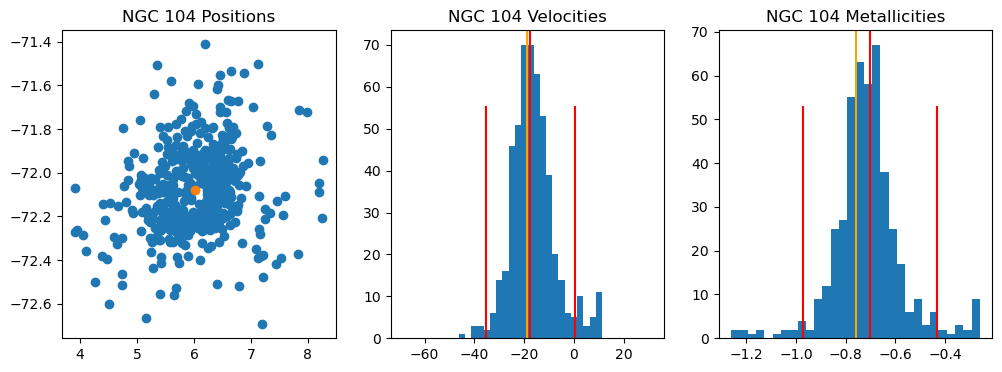

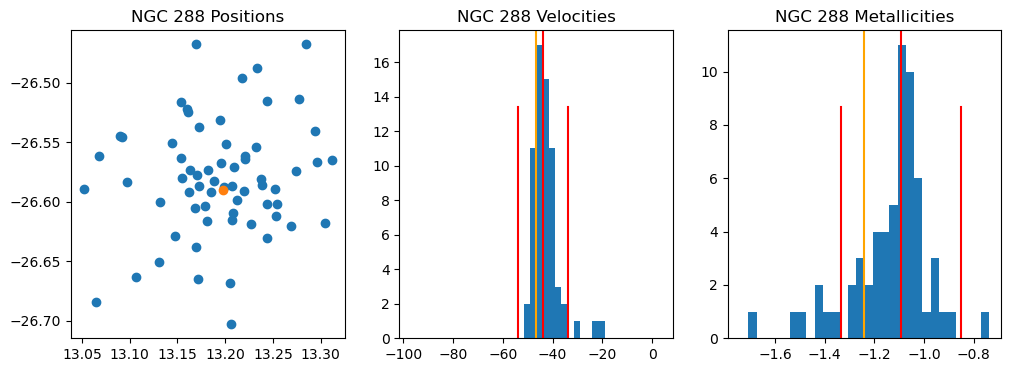

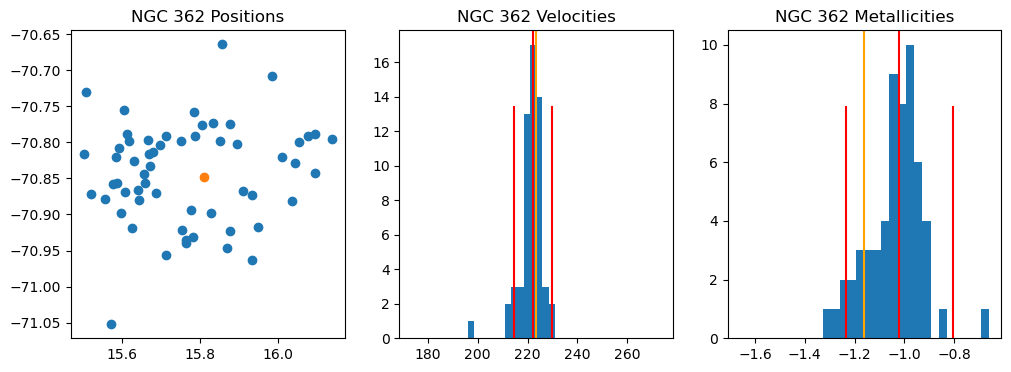

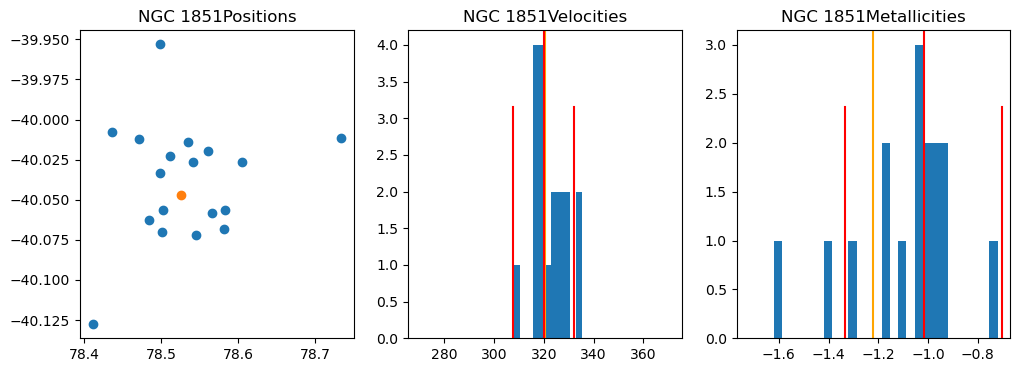

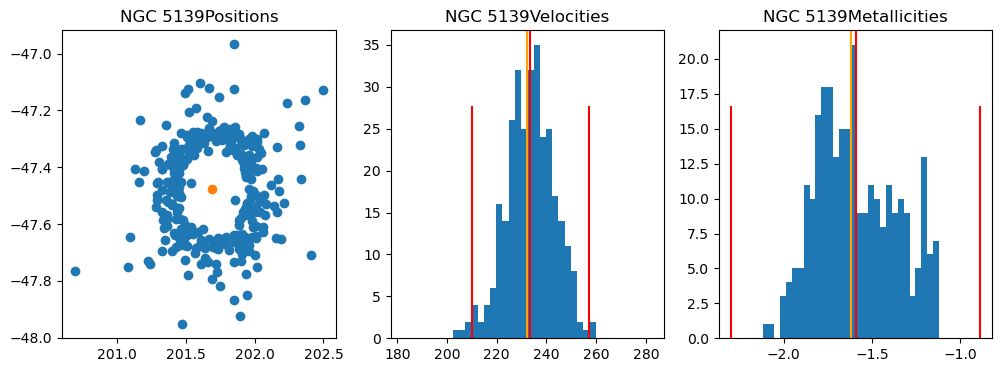

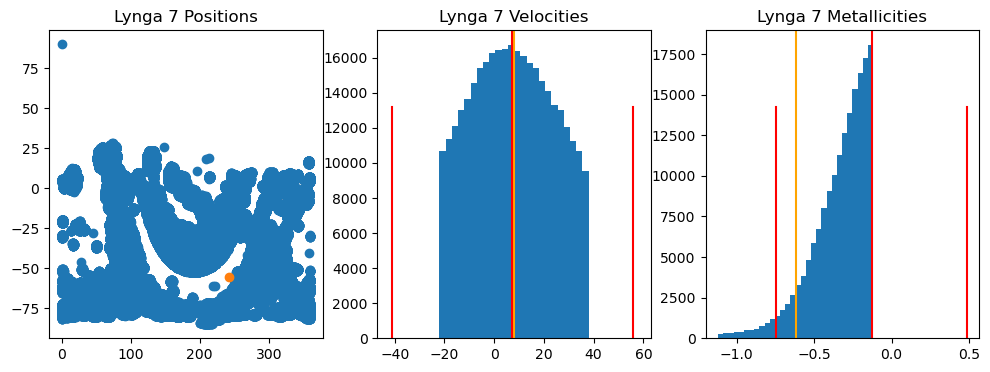

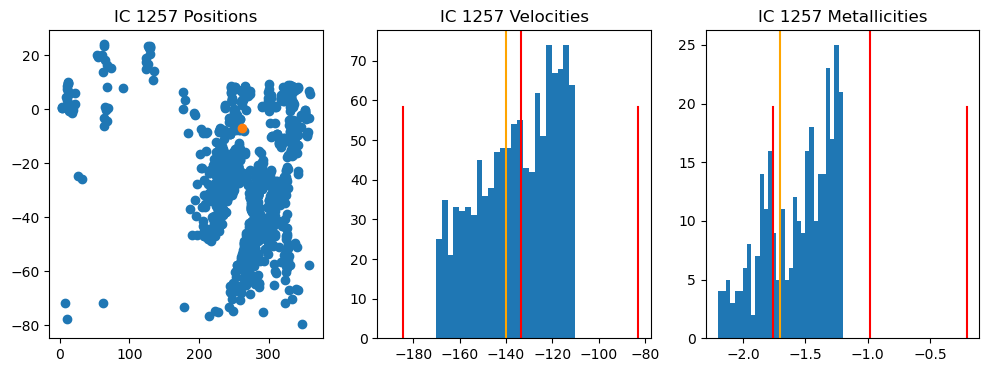

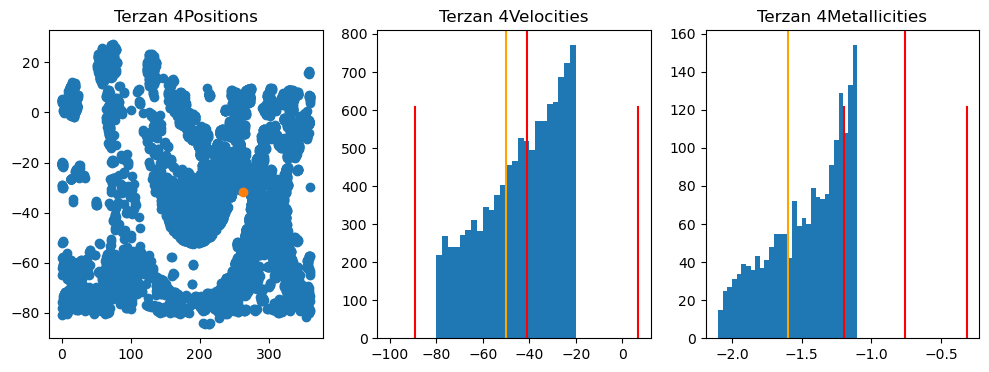

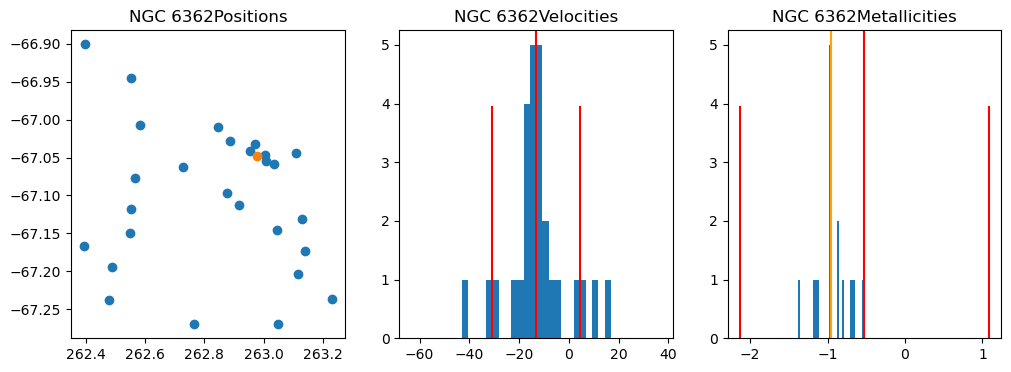

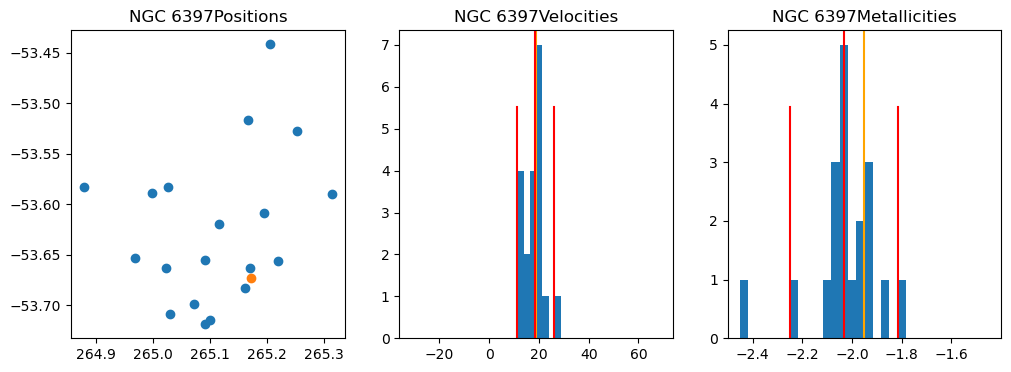

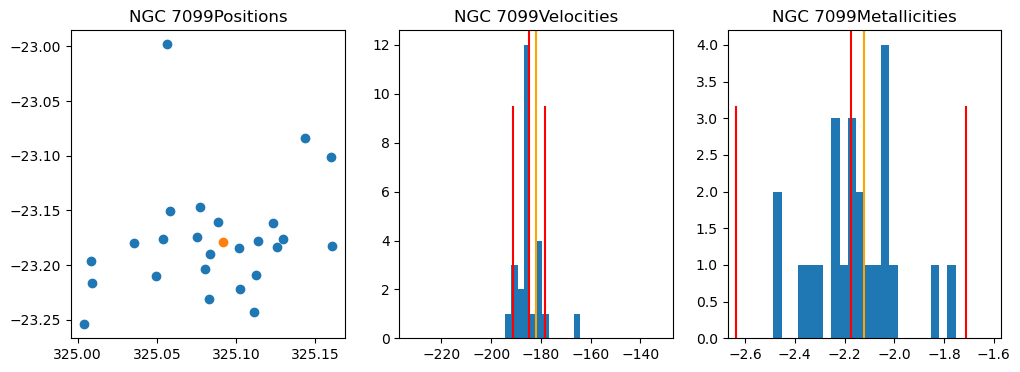

In [13]:
for i in range(len(cluster_stars)):
    graphmin = glob_clust[i]["RV"] -50
    graphmax = graphmin + 100
    
    metalmin = glob_clust[i]["FEH"] - .5
    metalmax = metalmin + 1
    
    if(numberOfMatches[i]<10):
        continue
    
    plt.figure(figsize=(12,4))
    plt.subplot(131)
    plt.scatter(cluster_stars[i]["ra_dr2"], cluster_stars[i]["dec_dr2"])
    plt.scatter(glob_clust[i]["RA"]*15, glob_clust[i]["DEC"])
    plt.title(glob_clust[i]["ID"] + "Positions")
    
    plt.subplot(132)
    plt.hist(cluster_stars[i]["rv_galah"],range=[graphmin,graphmax],bins=40)
    plt.axvline(glob_clust[i]["RV"],0,1,color="orange")
    plt.axvline(medvel[i],0,1,color="red")
    plt.axvline(medvel[i] + stdvel[i]*2.5,0,.75,color="red")
    plt.axvline(medvel[i] - stdvel[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Velocities")
    
    plt.subplot(133)
    plt.hist(cluster_stars[i]["fe_h"],range=[metalmin,metalmax],bins=30)
    plt.axvline(glob_clust[i]["FEH"],0,1,color="orange")
    plt.axvline(medmet[i],0,1,color="red")
    plt.axvline(medmet[i] + stdmet[i]*2.5,0,.75,color="red")
    plt.axvline(medmet[i] - stdmet[i]*2.5,0,.75,color="red")
    plt.title(glob_clust[i]["ID"] + "Metallicities")
    plt.show()